# `Class 1: Knowing the Data`

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.1 Conhecendo nossos dados e o Pandas


In [95]:
# importando pandas
import pandas as pd


In [96]:
# carregando arquivo
url = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv'

df_1 = pd.read_csv(url, sep=',')
df_1


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [97]:
# verificando formato do DataFrama
df_1.shape


(100836, 4)

In [98]:
# verificando nomes das colunas
df_1.columns


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [99]:
# primeiras 10 linhas
df_1.head(10)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### 1.2 Primeiras visualizações 

<Axes: ylabel='Frequency'>

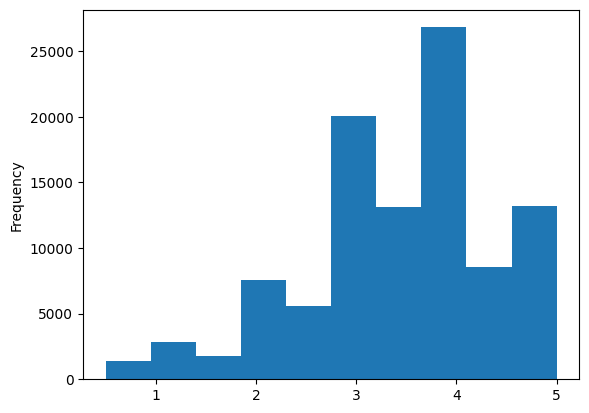

In [100]:
# plotando algumas informações
df_1['rating'].plot(kind='hist')


In [101]:
# calculando média de uma coluna
media = df_1["rating"].mean()

# calculando mediana de uma coluna
mediana = df_1["rating"].median()

print(media)
print(mediana)


3.501556983616962
3.5


In [102]:
# utilizando função `describe`
df_1["rating"].describe()


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<Axes: ylabel='rating'>

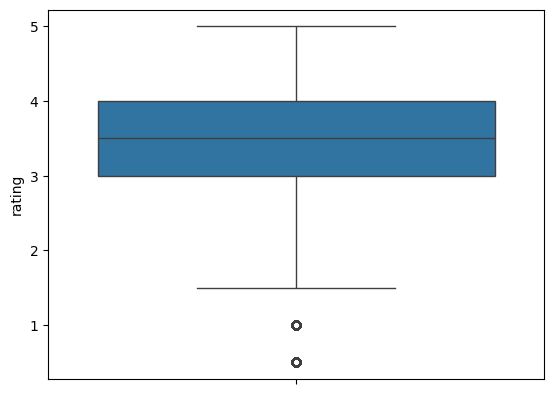

In [103]:
# plotando algo com boxplot
sns.boxplot(df_1["rating"]) 


# `Class 2: Analyzing the Data`

### 2.1 Explorando os Dados

In [104]:
# importando nova tabela com mais infos sobre os filmes
url2 = "https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv"

df_2 = pd.read_csv(
    url2,
    sep=","
)

df_2


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [105]:
# média de notas relacionadas ao filme de id == 1
media1 = df_1.query("movieId == 1")["rating"].mean()

# podemos escrever essa mesma query acima da seguinte forma
media2 = df_1[df_1["movieId"] == 1]["rating"].mean()

print(media1)
print(media2)

3.9209302325581397
3.9209302325581397


In [106]:
# agrupando informações por id do filme e trazendo a média de cada um deles
medias_por_filme = df_1.groupby("movieId")["rating"].mean()
medias_por_filme.head()


movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

### 2.2 Distribuindo as Médias dos Filmes

<Axes: ylabel='rating'>

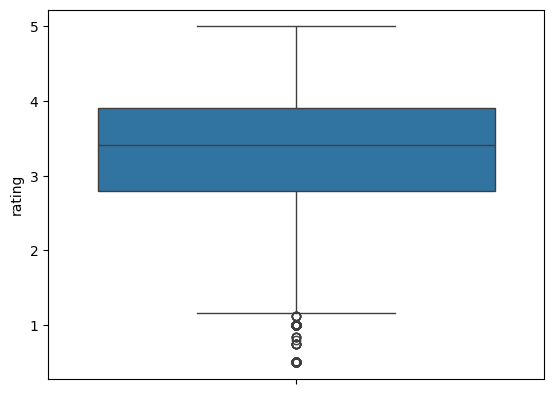

In [107]:
# gráfico de médias por filme
sns.boxplot(medias_por_filme)


In [108]:
# utilizando describe() para comparar infos com o gráfico de boxplot
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

Text(0.5, 1.0, 'Histograma das médias dos filmes')

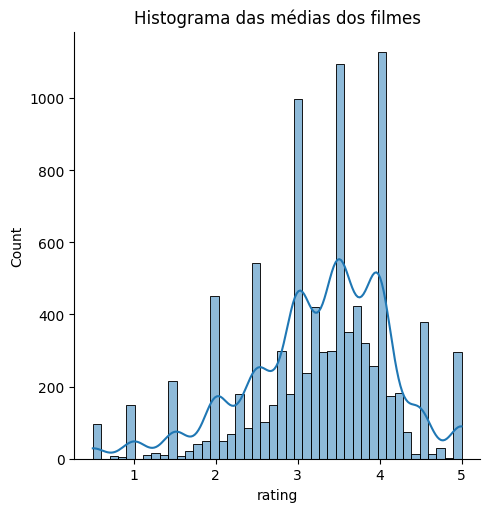

In [109]:
# utilzando função do seaborn e matplotlib para mostrar um gráfico de dispersão 
sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")

# `Class 3: Understanding Variables Types`

### 3.1 Explorando a base de dados do TMDB

In [110]:
# importando nova base de dados
df_3 = pd.read_csv("arquivos/tmdb_5000_movies.csv", sep=",")
df_3


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

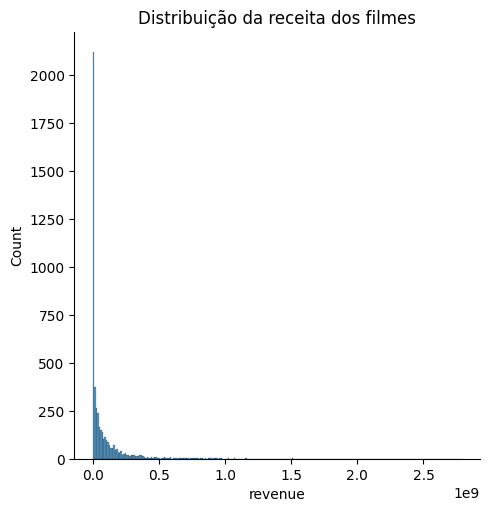

In [111]:
# plotando faturamento dos filmes 
sns.displot(df_3["revenue"])
plt.title("Distribuição da receita dos filmes")
plt.show()

In [112]:
# verificando que tipo de informações há no DataFrame 
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

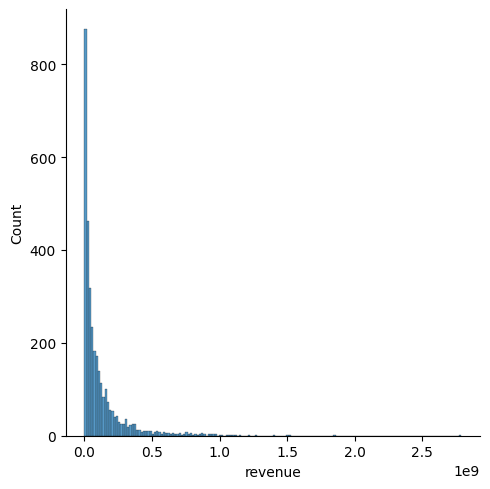

In [113]:
# Tratando os dados e tirando todos aquels que tem "revenue" == 0
com_faturamento = df_3.query("revenue > 0")

# plotando as informações que filtramos
sns.displot(com_faturamento["revenue"])
plt.show()

### 3.2 Tipos de Variáveis

In [114]:
# mostrando valores únicos da coluan "original_language"
df_3["original_language"].unique()

# mostando o número de vezes que cada valor único, da coluna "original_language", aparece
df_3["original_language"].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

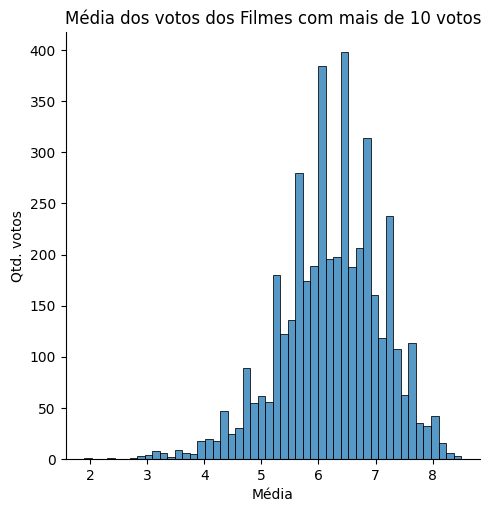

In [115]:
# distribuição da média das notas do TMDB (vote_avarage) em que o número de votos (vote_count) seja maior que 10
df_votos_maior_dez = df_3.query("vote_count > 10")
df_media_votos = df_votos_maior_dez["vote_average"]

# plotando gráfico da informação que obitevemos
sns.displot(df_media_votos)
plt.title("Média dos votos dos Filmes com mais de 10 votos")
plt.xlabel("Média")
plt.ylabel("Qtd. votos")
plt.show()

# `Class 4: Viewing Data`

### 4.1 Visualizando Gráficos por Categoria

<Axes: xlabel='original_language', ylabel='total'>

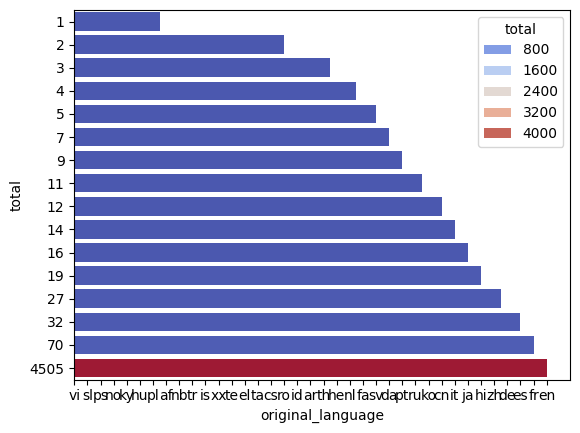

In [116]:
# mostando o número de vezes que cada valor único, da coluna "original_language", aparece
total_por_lingua = df_3["original_language"].value_counts()

# Transformando a Serie obita em um DataFrama
total_por_lingua = total_por_lingua.to_frame()

# resentando o index para organizar os cabeçalhos
total_por_lingua = total_por_lingua.reset_index()

# modificando o nome das colunas para que estejam coesas com o que esta sendo mostrado
total_por_lingua.columns = ["original_language", "total"]

# plotando o gráfico das informações obtidas
sns.barplot(
    data=total_por_lingua,
    x="original_language",
    y="total",
    orient="h",
    hue="total",
    palette="coolwarm",
    errorbar=None
)

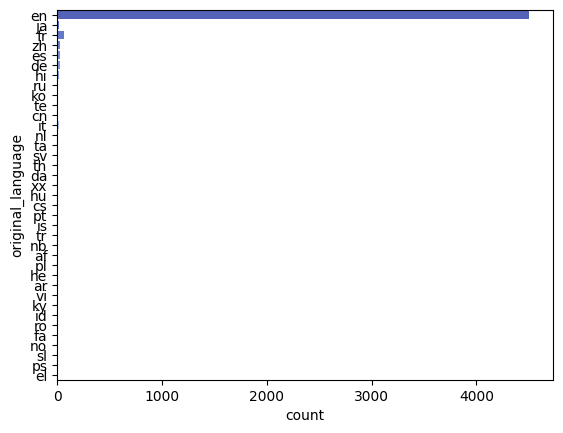

In [117]:
# Podemos fazer extamente a mesma coisa que fizemos na célula anterior com menos código da seguinte forma:
ax = sns.countplot(
    data=df_3, 
    y="original_language",
    hue="original_language",
    palette="coolwarm"
)

### 4.2 Passando uma mensagem através de Visualização

In [126]:
# Separando total de filme inglâs de não-inglês
total_ingles = total_por_lingua.loc[0, "total"]

# Somando valores da coluna total
total_geral = total_por_lingua["total"].sum()

# Subtração do total de  "outras linguas" pelo total de filmes em inglês 
total_resto = total_geral - total_ingles

total_resto


np.int64(298)

### 4.3 Interpretando o propósito de uma Visualização

# `Class 5: Adjusting the Visuals`

# `Class 6: Data Statistics`